# Project: Wrangling and Analyze Data

# Table of Contents
1. Gathering Data(CSV file,Twitter API, Json file)
2. Assessing Data
3. Quality and Tidiness Issues
4. Cleaning Data
5. Creating and storing Master Dataset
6. Analyze master dataset
7. Insight
8. Visualizations


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
#Importing the packages needed for analysis
import pandas as pd
import numpy as np
import requests
import os
import json

In [4]:
#Load dataset of a csv file
rate_dogs= pd.read_csv(r"C:\Users\HP\Desktop\Afrofem Data Analytics 2 class\twitter-archive-enhanced.csv")
rate_dogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
#Load dataset downloaded from a request library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)


In [6]:
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
#Load dataset gathered by twitter API
with open('tweet-json.txt','r')as file:
    lines = file.readlines()
rate_dogstweet= []
for line in lines:
    rate_dogstweet.append(json.loads(line))
ratedogs_json = pd.DataFrame(rate_dogstweet)

ratedogs_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [8]:
#Twitter API dataset with set option to display all columns
ratedogs_json
pd.set_option('display.max_columns',None)
ratedogs_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,6514,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,4328,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8964,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,9774,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
#Investigating csv file dataset further using the .info() function

rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
#Investigating the csv dataset further
rate_dogs

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
#Using value counts to check the contents of the last four columns,i.e,puppo pupper,doggo and floofer
rate_dogs.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [12]:
rate_dogs.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [13]:
rate_dogs.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [14]:
rate_dogs.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [15]:
#Investigating the rating denomintor column
rate_dogs[rate_dogs['rating_denominator'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [16]:
#Investigating the rating numerator column
rate_dogs[rate_dogs['rating_numerator'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [17]:
#Investigating the twitter API json dataset further with the .info() function
ratedogs_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [18]:
#Changing json dataset to string and checking for duplicates
ratedogs_json.astype(str).duplicated().sum()

0

In [19]:
#Checking csv file dataset for duplicates
rate_dogs.duplicated().sum()

0

In [20]:
#Checking dataset downloaded from request library for duplicates
image_predictions.duplicated().sum()

0

In [21]:
#Investigating the request library downloaded dataset further with the .info() function
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
#Checking for null values in csv file dataset
rate_dogs.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [23]:
#Checking for null values in json dataset
ratedogs_json.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [24]:
#Checking for null values in request library downloaded dataset
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Quality issues
1. Missing values in rate_dogs columns. in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp,expanded_urls.

2. Missing values in ratedogs_json columns. extended_entities,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str, geo, coordinate, contributors.

3. Change tweet_id datatype from int to object.

4. doggo,fluffer,puppo and pupper columns have "None" in them.

5. Change image prediction column names to make them comprehensible.

6. Change column name on ratedogs_json from id to tweet_id.

7. Retweets have non-null rows in rate_dogs dataset.

8. Retweets have non-null rows in ratedogs_json dataset.

### Tidiness issues
1. doggo, fluffer, puppo and pupper columns should be melted into a dog stage column.

2. There are irrelevant columns in rate_dogs and ratedogs_json dataframes.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
rate_dogs_clean = rate_dogs.copy()
ratedogs_json_clean = ratedogs_json.copy()
image_predictions_clean = image_predictions.copy()

### Issue 1: Retweets have non-null rows.

### Define:Drop non-null rows in retweets

### Code:

In [26]:
# Rows with retweets, which were non-null were dropped.
in_reply_to_clear = rate_dogs_clean[rate_dogs_clean.in_reply_to_status_id.notnull()].index.tolist()
rate_dogs_clean.drop(in_reply_to_clear, inplace = True)


In [27]:
#Rows with retweets, which were non-null were dropped
retweeted_clear = rate_dogs_clean[rate_dogs_clean.retweeted_status_id.notnull()].index.tolist()
rate_dogs_clean.drop(retweeted_clear, inplace = True)


### Test:

In [28]:
rate_dogs_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


### Issue #2: Rows have retweets in ratedogs_json dataframe

### Define: Drop rows with retweets.

### Code

In [29]:
#Rows concerning retweets were dropped
in_reply_to_json_clear = ratedogs_json_clean[ratedogs_json_clean.in_reply_to_status_id.notnull()].index.tolist()
ratedogs_json_clean.drop(in_reply_to_json_clear, inplace = True)


In [30]:
#Rows concerning retweets were dropped
retweeted_json_clear = ratedogs_json_clean[ratedogs_json_clean.retweeted_status.notnull()].index.tolist()
ratedogs_json_clean.drop(retweeted_json_clear, inplace = True)


### Test

In [31]:
ratedogs_json_clean

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,6514,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,4328,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8964,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,9774,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,41,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,147,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/down

### Issue #3: Missing values in rate_dogs columns. in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp,expanded_urls.

#### Define: Drop columns with missing values that are not relevant

#### Code

In [32]:
#Drop columns with missing values that are not relevant to this analysis.
rate_dogs_clean.drop(['timestamp','in_reply_to_user_id','retweeted_status_timestamp','expanded_urls','retweeted_status_id','source','retweeted_status_user_id','in_reply_to_status_id'], axis=1, inplace=True)

#### Test

In [33]:
rate_dogs_clean

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,None,None,None,None
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,None,None,None,None
2353,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10,a,None,None,None,None
2354,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,10,a,None,None,None,None


### Issue #4: Missing values in ratedogs_json columns. extended_entities,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str, geo, coordinate, contributors.


#### Define: Drop columns with missing values that are not relevant.

#### Code

In [34]:
#Dropping columns that are not relevant to the analysis,i.e, columns concerning retweets as well as empty columns
ratedogs_json_clean.drop(['extended_entities','full_text','in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','geo','coordinates','contributors','created_at','id_str','truncated','display_text_range','entities','source','in_reply_to_screen_name','user','place','is_quote_status','favorited','quoted_status_id_str','quoted_status','retweeted','possibly_sensitive','possibly_sensitive_appealable','lang','retweeted_status','quoted_status_id'],axis=1,inplace=True)

#### Test

In [35]:
ratedogs_json_clean

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Issue #5: tweet_id datatype is int.

### Define: Change tweet_id datatype from int to str.

### Code:


In [36]:
#Change tweet_id datatype from int to string
rate_dogs_clean['tweet_id'] = rate_dogs_clean['tweet_id'].astype(str)


In [37]:
ratedogs_json_clean['id'] = ratedogs_json_clean['id'].astype(str)

In [38]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

### Test:

In [39]:
rate_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   object
 1   text                2097 non-null   object
 2   rating_numerator    2097 non-null   int64 
 3   rating_denominator  2097 non-null   int64 
 4   name                2097 non-null   object
 5   doggo               2097 non-null   object
 6   floofer             2097 non-null   object
 7   pupper              2097 non-null   object
 8   puppo               2097 non-null   object
dtypes: int64(2), object(7)
memory usage: 163.8+ KB


In [40]:
ratedogs_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2097 non-null   object
 1   retweet_count   2097 non-null   int64 
 2   favorite_count  2097 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 65.5+ KB


In [41]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue 6: image prediction column names  are incomprehensible.

### Define:Change image prediction columns to make them comprehensible

### Code

In [42]:
#Change image prediction ncolumn names to make them comprehensible
image_predictions_clean.rename(columns = {'p1':'first_prediction', 'p1_conf':'first_pred_confidence','p2':'sec_prediction','p2_conf': 'sec_pred_confidence','p3':'third_prediction','p3_conf':'third_pred_confidence'}, inplace = True)


### Test:

In [43]:
image_predictions_clean

,tweet_id,jpg_url,img_num,first_prediction,first_pred_confidence,p1_dog,sec_prediction,sec_pred_confidence,p2_dog,third_prediction,third_pred_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Issue 7: Column name on ratedogs_json is id.

### Define: Change column name from id to tweet_id.

### Code:

In [44]:
#Change column name in json dataframe from id to tweet_id to merge later on
ratedogs_json_clean.rename(columns = {'id': 'tweet_id'}, inplace=True)

### Test:

In [45]:
ratedogs_json_clean

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


### Issue 8: The doggo,floofer,pupper and puppo columns had none in them

### Define: Melt doggo,floofer, pupper ad puppo columns into one column called dog_stages

### Code

In [46]:
#Replace the "None" in doggo, puppo, floofer and pupper columns with empty string
rate_dogs_clean.doggo.replace('None','',inplace=True)
rate_dogs_clean.floofer.replace('None','',inplace=True)
rate_dogs_clean.pupper.replace('None','',inplace=True)
rate_dogs_clean.puppo.replace('None','',inplace=True)

In [47]:
#Create a new column with doggo,floofer,pupper and puppo
rate_dogs_clean['dog_stages'] = rate_dogs_clean['doggo'] + rate_dogs_clean['floofer'] + rate_dogs_clean['pupper'] + rate_dogs_clean['puppo']

In [48]:
#Drop pupper,puppo,doggo and floofer columns
rate_dogs_clean.drop(['pupper','puppo','doggo','floofer'],axis=1,inplace=True)

In [56]:
rate_dogs_clean.dog_stages.value_counts()

                  1761
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: dog_stages, dtype: int64

In [57]:
#Formatting names of dogs that are put togather,i.e. doggopupper into doggo, pupper
rate_dogs_clean.loc[rate_dogs_clean.dog_stages =='doggopupper','dog_stages']='doggo, pupper'
rate_dogs_clean.loc[rate_dogs_clean.dog_stages =='doggopuppo','dog_stages']='doggo, puppo'
rate_dogs_clean.loc[rate_dogs_clean.dog_stages =='doggofloofer','dog_stages']='doggo, floofer'

### Test

In [58]:
rate_dogs_clean

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,
...,...,...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,
2353,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10,a,
2354,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,10,a,


In [59]:
rate_dogs_clean.dog_stages.value_counts() #Some rows had two stages hence; duggopupper,doggopuppo and doggofloofer

                  1761
pupper             221
doggo               72
puppo               23
floofer              9
doggo, pupper        9
doggo, puppo         1
doggo, floofer       1
Name: dog_stages, dtype: int64

### Issue #9: Create a master dataset

### Define: Create a master dataset to make the data comprehensive

### Code

In [60]:
#Merge the three clean datasets; rate_dogs_clean,ratedogs_json_clean and image_predictions_clean
twitter_master_archive=pd.merge(rate_dogs_clean,ratedogs_json_clean, on= 'tweet_id',how='left')

In [61]:
twitter_master_archive=pd.merge(twitter_master_archive,image_predictions_clean,on='tweet_id',how='left')

### Test

In [62]:
twitter_master_archive

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,first_prediction,first_pred_confidence,p1_dog,sec_prediction,sec_pred_confidence,p2_dog,third_prediction,third_pred_confidence,p3_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2093,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2094,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10,a,,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2095,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,10,a,,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [63]:
#Replacing the empty string in dog_stages column with "No Stage"
twitter_master_archive.dog_stages.replace('','No Stage',inplace=True)

In [64]:
twitter_master_archive

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,first_prediction,first_pred_confidence,p1_dog,sec_prediction,sec_pred_confidence,p2_dog,third_prediction,third_pred_confidence,p3_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,No Stage,8853,39467,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,No Stage,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,No Stage,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,No Stage,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,No Stage,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,No Stage,41,111,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1.0,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2093,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,No Stage,147,311,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2094,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10,a,No Stage,47,128,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2095,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,10,a,No Stage,48,132,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [65]:
#Storing the master dataset to csv
twitter_master_archive.to_csv('twitter_master_archive.csv',index=False)


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [66]:
#Analyzing and the master dataset
twitter_master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   object 
 1   text                   2097 non-null   object 
 2   rating_numerator       2097 non-null   int64  
 3   rating_denominator     2097 non-null   int64  
 4   name                   2097 non-null   object 
 5   dog_stages             2097 non-null   object 
 6   retweet_count          2097 non-null   int64  
 7   favorite_count         2097 non-null   int64  
 8   jpg_url                1971 non-null   object 
 9   img_num                1971 non-null   float64
 10  first_prediction       1971 non-null   object 
 11  first_pred_confidence  1971 non-null   float64
 12  p1_dog                 1971 non-null   object 
 13  sec_prediction         1971 non-null   object 
 14  sec_pred_confidence    1971 non-null   float64
 15  p2_d

In [67]:

twitter_master_archive.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,first_pred_confidence,sec_pred_confidence,third_pred_confidence
count,2097.000000,2097.000000,2097.000000,2097.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03
mean,12.189318,10.448736,2841.667620,8980.902241,1.201928,0.594558,1.345850e-01,6.016556e-02
std,40.364996,6.645061,4709.238203,12199.636684,0.559020,0.272126,1.010527e-01,5.094156e-02
min,0.000000,2.000000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,644.000000,2046.000000,1.000000,0.363091,5.339800e-02,1.608055e-02
50%,11.000000,10.000000,1405.000000,4196.000000,1.000000,0.587764,1.173970e-01,4.944380e-02
75%,12.000000,10.000000,3285.000000,11416.000000,1.000000,0.847827,1.955655e-01,9.153815e-02
max,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [68]:
#Checking the null values of the dataframe
twitter_master_archive[twitter_master_archive['jpg_url'].isna()]

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,img_num,first_prediction,first_pred_confidence,p1_dog,sec_prediction,sec_pred_confidence,p2_dog,third_prediction,third_pred_confidence,p3_dog
32,885518971528720385,I have a new hero and his name is Howard. 14/1...,14,10,None,No Stage,3899,20788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,884247878851493888,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,13,10,None,No Stage,21298,74423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,878604707211726852,Martha is stunning how h*ckin dare you. 13/10 ...,13,10,None,No Stage,7582,30931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,876537666061221889,I can say with the pupmost confidence that the...,14,10,None,No Stage,4800,23869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,875097192612077568,You'll get your package when that precious man...,13,10,None,No Stage,6342,27997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,676916996760600576,Super speedy pupper. Does not go gentle into t...,10,10,None,pupper,2002,3231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1579,676593408224403456,This pupper loves leaves. 11/10 for committed ...,11,10,None,pupper,2410,4954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1594,676121918416756736,Here we are witnessing a very excited dog. Cle...,8,10,None,No Stage,1297,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1666,674307341513269249,This is life-changing. 12/10 https://t.co/SroT...,12,10,life,No Stage,7641,12129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
#Checking to see if float datatypes were maintained
twitter_master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   object 
 1   text                   2097 non-null   object 
 2   rating_numerator       2097 non-null   int64  
 3   rating_denominator     2097 non-null   int64  
 4   name                   2097 non-null   object 
 5   dog_stages             2097 non-null   object 
 6   retweet_count          2097 non-null   int64  
 7   favorite_count         2097 non-null   int64  
 8   jpg_url                1971 non-null   object 
 9   img_num                1971 non-null   float64
 10  first_prediction       1971 non-null   object 
 11  first_pred_confidence  1971 non-null   float64
 12  p1_dog                 1971 non-null   object 
 13  sec_prediction         1971 non-null   object 
 14  sec_pred_confidence    1971 non-null   float64
 15  p2_d

In [70]:
#Replacing NaN values with "."
twitter_master_archive = twitter_master_archive.replace(np.nan,'.', regex=True)

In [71]:
#Maintaining the float datatype of the image prediction confidence columns to be used for further analysis
twitter_master_archive['first_pred_confidence'] = pd.to_numeric(twitter_master_archive['first_pred_confidence'],errors='coerce')
twitter_master_archive['sec_pred_confidence'] = pd.to_numeric(twitter_master_archive['sec_pred_confidence'],errors='coerce')
twitter_master_archive['third_pred_confidence'] = pd.to_numeric(twitter_master_archive['third_pred_confidence'],errors='coerce')

In [72]:
twitter_master_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   object 
 1   text                   2097 non-null   object 
 2   rating_numerator       2097 non-null   int64  
 3   rating_denominator     2097 non-null   int64  
 4   name                   2097 non-null   object 
 5   dog_stages             2097 non-null   object 
 6   retweet_count          2097 non-null   int64  
 7   favorite_count         2097 non-null   int64  
 8   jpg_url                2097 non-null   object 
 9   img_num                2097 non-null   object 
 10  first_prediction       2097 non-null   object 
 11  first_pred_confidence  1971 non-null   float64
 12  p1_dog                 2097 non-null   object 
 13  sec_prediction         2097 non-null   object 
 14  sec_pred_confidence    1971 non-null   float64
 15  p2_d

In [73]:
twitter_master_archive.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [74]:
twitter_master_archive.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       153
8        98
7        52
14       38
5        34
6        32
3        19
4        16
2         9
1         5
27        1
45        1
88        1
144       1
26        1
121       1
44        1
60        1
80        1
75        1
99        1
50        1
204       1
1776      1
165       1
0         1
84        1
24        1
420       1
Name: rating_numerator, dtype: int64

### Insights:
1. After combining the data, there seem to be null values due to the merge. However, dropping rows or values with null values would drop other relevant information in the dataframe. The data has been replaced by string ".".

2. There is a higher count of trues than falses in the image detected.

3. Ratings are very unique and do not follow regular scales.

### Visualization

In [75]:
#Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

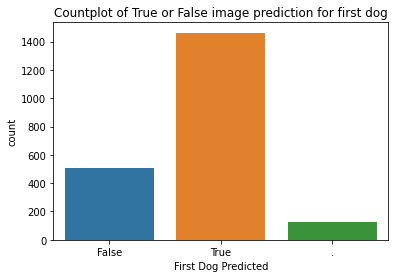

In [76]:
sns.countplot(x='p1_dog',data=twitter_master_archive); #Countplot analysis of p1_dog, whether the image prdiction is true or false. The green bar represents empty values after merge
plt.title("Countplot of True or False image prediction for first dog")
plt.xlabel("First Dog Predicted");

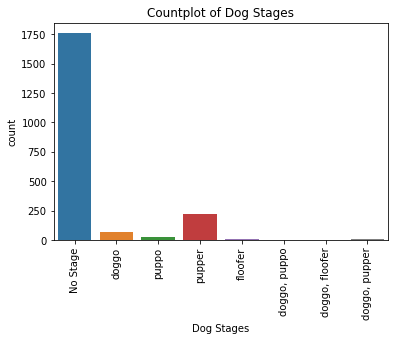

In [77]:
sns.countplot(x='dog_stages',data=twitter_master_archive); #Countplot analysis of dog stages.
plt.title("Countplot of Dog Stages")
plt.xlabel("Dog Stages")
plt.xticks(rotation=90);